<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/genre_classification/GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

df=pd.read_csv('dataset/Spotify_train_dataset.csv')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data=df.drop(labels=['type','id','uri','track_href','analysis_url','song_name'],axis=1)

genres=['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop', 'techhouse', 'techno',
'trance', 'psytrance', 'trap', 'dnb', 'hardstyle']

le = LabelEncoder()
le.classes_=genres
data['genre']=le.transform(data['genre'])

X=data[data.columns[:-1]].to_numpy()
Y=data['genre'].to_numpy()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Done
(25382, 13) (25382,) (6346, 13) (6346,)


In [ ]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,genre
0,0.449,0.809,6,-3.366,1,0.0847,0.002340,0.876000,0.1100,0.1150,142.490,audio_features,15iEkKqQPgXjtHrvvL4Gvb,spotify:track:15iEkKqQPgXjtHrvvL4Gvb,https://api.spotify.com/v1/tracks/15iEkKqQPgXj...,https://api.spotify.com/v1/audio-analysis/15iE...,234310,4,NaN,trap
1,0.618,0.654,5,-14.305,0,0.4220,0.226000,0.864000,0.1110,0.1760,127.953,audio_features,2kLaJQILsNVOyiZvn8XaEc,spotify:track:2kLaJQILsNVOyiZvn8XaEc,https://api.spotify.com/v1/tracks/2kLaJQILsNVO...,https://api.spotify.com/v1/audio-analysis/2kLa...,364098,4,NaN,techno
2,0.696,0.896,7,-5.915,1,0.1080,0.016400,0.866000,0.1030,0.5700,128.001,audio_features,5nBuY24pWqH3GoavwlGd4P,spotify:track:5nBuY24pWqH3GoavwlGd4P,https://api.spotify.com/v1/tracks/5nBuY24pWqH3...,https://api.spotify.com/v1/audio-analysis/5nBu...,506250,4,NaN,techno
3,0.769,0.506,0,-11.658,1,0.0452,0.002730,0.000000,0.0832,0.1020,120.004,audio_features,6GZRum7yJqfnGZGfIcGIaq,spotify:track:6GZRum7yJqfnGZGfIcGIaq,https://api.spotify.com/v1/tracks/6GZRum7yJqfn...,https://api.spotify.com/v1/audio-analysis/6GZR...,232046,4,$UICIDEWAVE,Dark Trap
4,0.400,0.676,11,-7.118,0,0.0927,0.258000,0.000023,0.3200,0.3540,170.148,audio_features,5mZb9Kbl0uWhIS6RW47IHC,spotify:track:5mZb9Kbl0uWhIS6RW47IHC,https://api.spotify.com/v1/tracks/5mZb9Kbl0uWh...,https://api.spotify.com/v1/audio-analysis/5mZb...,180022,4,TR666 (feat. Swae Lee),Underground Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31723,0.855,0.586,6,-7.134,1,0.1670,0.200000,0.000000,0.2530,0.7510,138.132,audio_features,13sDDPTmAwDvkONEQ8OB3i,spotify:track:13sDDPTmAwDvkONEQ8OB3i,https://api.spotify.com/v1/tracks/13sDDPTmAwDv...,https://api.spotify.com/v1/audio-analysis/13sD...,85217,4,Smithy,Underground Rap
31724,0.760,0.726,0,-4.726,1,0.0652,0.057600,0.000000,0.0514,0.8860,139.893,audio_features,0PCKaqffqRsFYxKy7uTLti,spotify:track:0PCKaqffqRsFYxKy7uTLti,https://api.spotify.com/v1/tracks/0PCKaqffqRsF...,https://api.spotify.com/v1/audio-analysis/0PCK...,120059,4,Soul Doubt,Trap Metal
31725,0.464,0.838,8,-6.762,1,0.0401,0.000151,0.756000,0.0671,0.1510,173.995,audio_features,5RCkepCUwImdkbZhIUtglm,spotify:track:5RCkepCUwImdkbZhIUtglm,https://api.spotify.com/v1/tracks/5RCkepCUwImd...,https://api.spotify.com/v1/audio-analysis/5RCk...,350345,4,NaN,dnb
31726,0.683,0.590,0,-4.949,1,0.3590,0.215000,0.000000,0.1350,0.0401,209.986,audio_features,72x9Lcah4SMfE5TRf7gira,spotify:track:72x9Lcah4SMfE5TRf7gira,https://api.spotify.com/v1/tracks/72x9Lcah4SMf...,https://api.spotify.com/v1/audio-analysis/72x9...,117923,4,Seventy Four,Dark Trap


# GradientBoosting

Gradient Boosting is a method similar to AdaBoost. It uses stumps (small trees of depth equal to 3) to get a prediction. Each stump predict the probability to belong to a class.

In [2]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import f1_score

## Boost0

With default parameters.

In [ ]:
boost0 = GradientBoostingClassifier()
boost0.fit(X_train,Y_train)

yhat_test=boost0.predict(X_test)
yhat_train=boost0.predict(X_train)

print(f1_score(Y_train,yhat_train,average='micro'))
print(f1_score(Y_test,yhat_test,average='micro'))

0.7412733433141597
0.690356129845572


## Boost1

The number of estimators goes from 100 to 200.

In [ ]:
boost1 = GradientBoostingClassifier(n_estimators=200,verbose=1)
boost1.fit(X_train,Y_train)

yhat_test=boost1.predict(X_test)
yhat_train=boost1.predict(X_train)

print(f1_score(Y_train,yhat_train,average='micro'))
print(f1_score(Y_test,yhat_test,average='micro'))

      Iter       Train Loss   Remaining Time 
         1       54551.0999            6.48m
         2       49226.0805            6.57m
         3       45433.2066            6.48m
         4       42560.7893            6.41m
         5       40238.0615            6.33m
         6       38300.8100            6.24m
         7       36650.1677            6.20m
         8       35237.3382            6.16m
         9       34040.7571            6.12m
        10       32975.4151            6.07m
        20       26897.9012            5.68m
        30       24221.0733            5.32m
        40       22683.6407            4.98m
        50       21648.7465            4.65m
        60       20910.4519            4.32m
        70       20257.7588            4.00m
        80       19735.4629            3.69m
        90       19255.6661            3.38m
       100       18835.4245            3.07m
       200       15965.7566            0.00s
0.7833110078008038
0.6941380397100536


## Boost2

The maximum number of features for each stump is limited to $\sqrt{n}$ with $n$ the number of features. It allows to reduce over fitting by limiting the effectiveness of each stump.

In [ ]:
boost2 = GradientBoostingClassifier(n_estimators=200,verbose=1,max_features='sqrt')
boost2.fit(X_train,Y_train)

yhat_test=boost2.predict(X_test)
yhat_train=boost2.predict(X_train)

print(f1_score(Y_train,yhat_train,average='micro'))
print(f1_score(Y_test,yhat_test,average='micro'))

      Iter       Train Loss   Remaining Time 
         1       59658.4578            2.15m
         2       54858.8276            2.16m
         3       50802.9771            2.18m
         4       48352.4114            2.17m
         5       46005.6933            2.15m
         6       44049.0464            2.14m
         7       42181.1573            2.09m
         8       40735.8171            2.08m
         9       39103.5333            2.07m
        10       37819.5776            2.05m
        20       29966.8646            1.93m
        30       26368.5714            1.79m
        40       24202.5246            1.70m
        50       22873.5505            1.59m
        60       21913.4687            1.47m
        70       21194.4368            1.37m
        80       20616.7096            1.26m
        90       20125.9605            1.16m
       100       19658.2085            1.05m
       200       16831.0404            0.00s
0.7661728784177764
0.6957138354869209


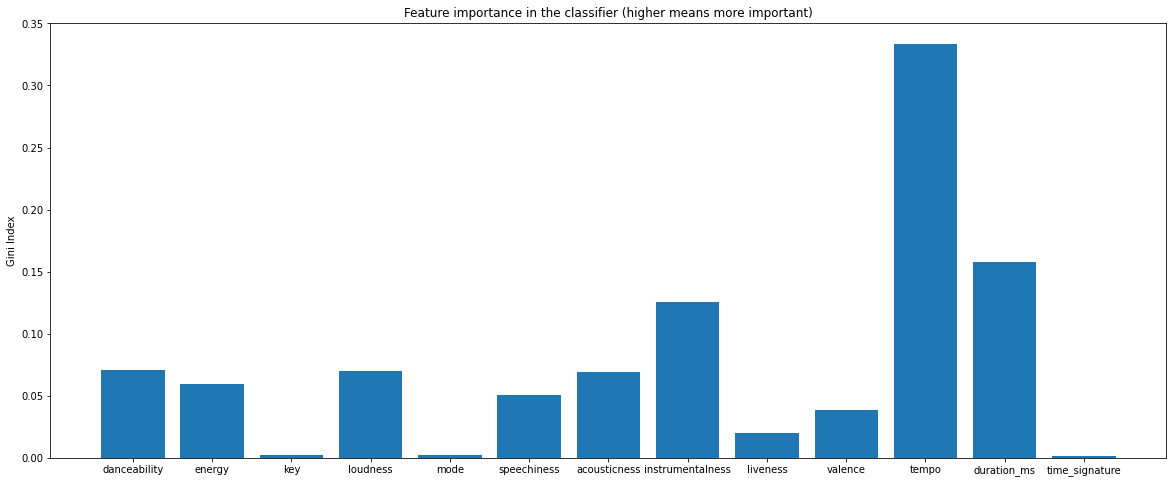

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Feature importance in the classifier (higher means more important)")
plt.ylabel("Gini Index")
plt.bar(range(13),boost2.feature_importances_)
plt.xticks(range(13),labels=data.columns[:-1])
plt.show()

## Boost3

After the examination of the feature importances, we observe that **key**, **mode** and **time_signature** do not contribute that much in the algorithm. We try to increase the performances by deleting these features

In [9]:
X1_train=np.delete(X_train,[2,4,12],axis=1)
X1_test=np.delete(X_test,[2,4,12],axis=1)

boost3=GradientBoostingClassifier(n_estimators=200,verbose=1,max_features='sqrt',random_state=10)
boost3.fit(X1_train,Y_train)

yhat_test=boost3.predict(X1_test)
yhat_train=boost3.predict(X1_train)

print(f1_score(Y_train,yhat_train,average='micro'))
print(f1_score(Y_test,yhat_test,average='micro'))

      Iter       Train Loss   Remaining Time 
         1       57031.1207            2.39m
         2       52279.8609            2.35m
         3       49210.6994            2.37m
         4       46462.3562            2.39m
         5       43873.1079            2.38m
         6       41943.0990            2.37m
         7       40153.3030            2.36m
         8       38660.9399            2.33m
         9       37068.6813            2.32m
        10       35783.9692            2.31m
        20       28586.4864            2.18m
        30       25279.5711            2.05m
        40       23475.5028            1.93m
        50       22320.8104            1.80m
        60       21471.9873            1.69m
        70       20834.6110            1.57m
        80       20282.2692            1.45m
        90       19827.0109            1.33m
       100       19403.4226            1.20m
       200       16568.2884            0.00s
0.7714128122291386
0.6953986763315474


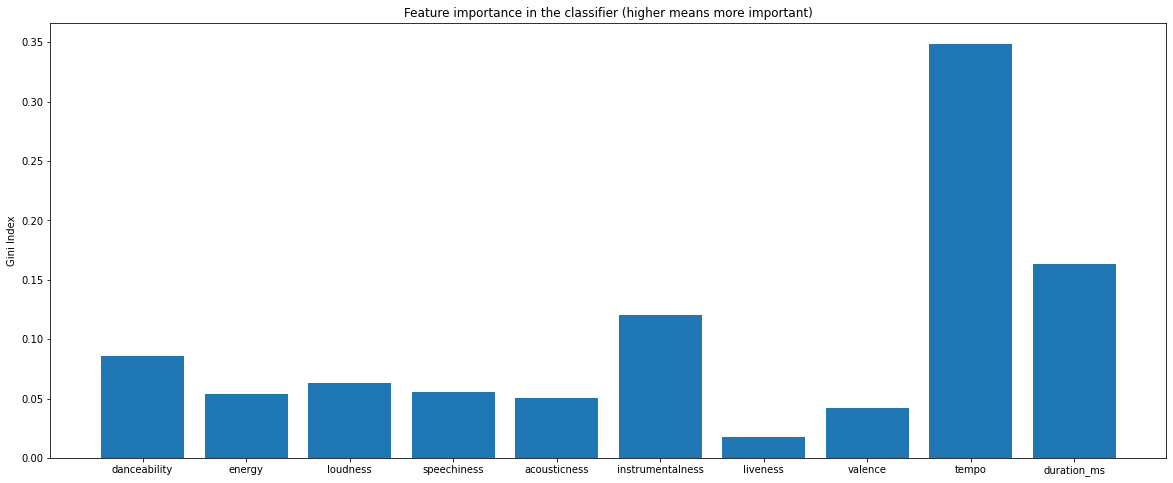

In [5]:
new_labels=['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

plt.figure(figsize=(20,8))
plt.title("Feature importance in the classifier (higher means more important)")
plt.ylabel("Gini Index")
plt.bar(range(10),boost3.feature_importances_)
plt.xticks(range(10),labels=new_labels)
plt.show()

### Observation of random stumps in Boost3

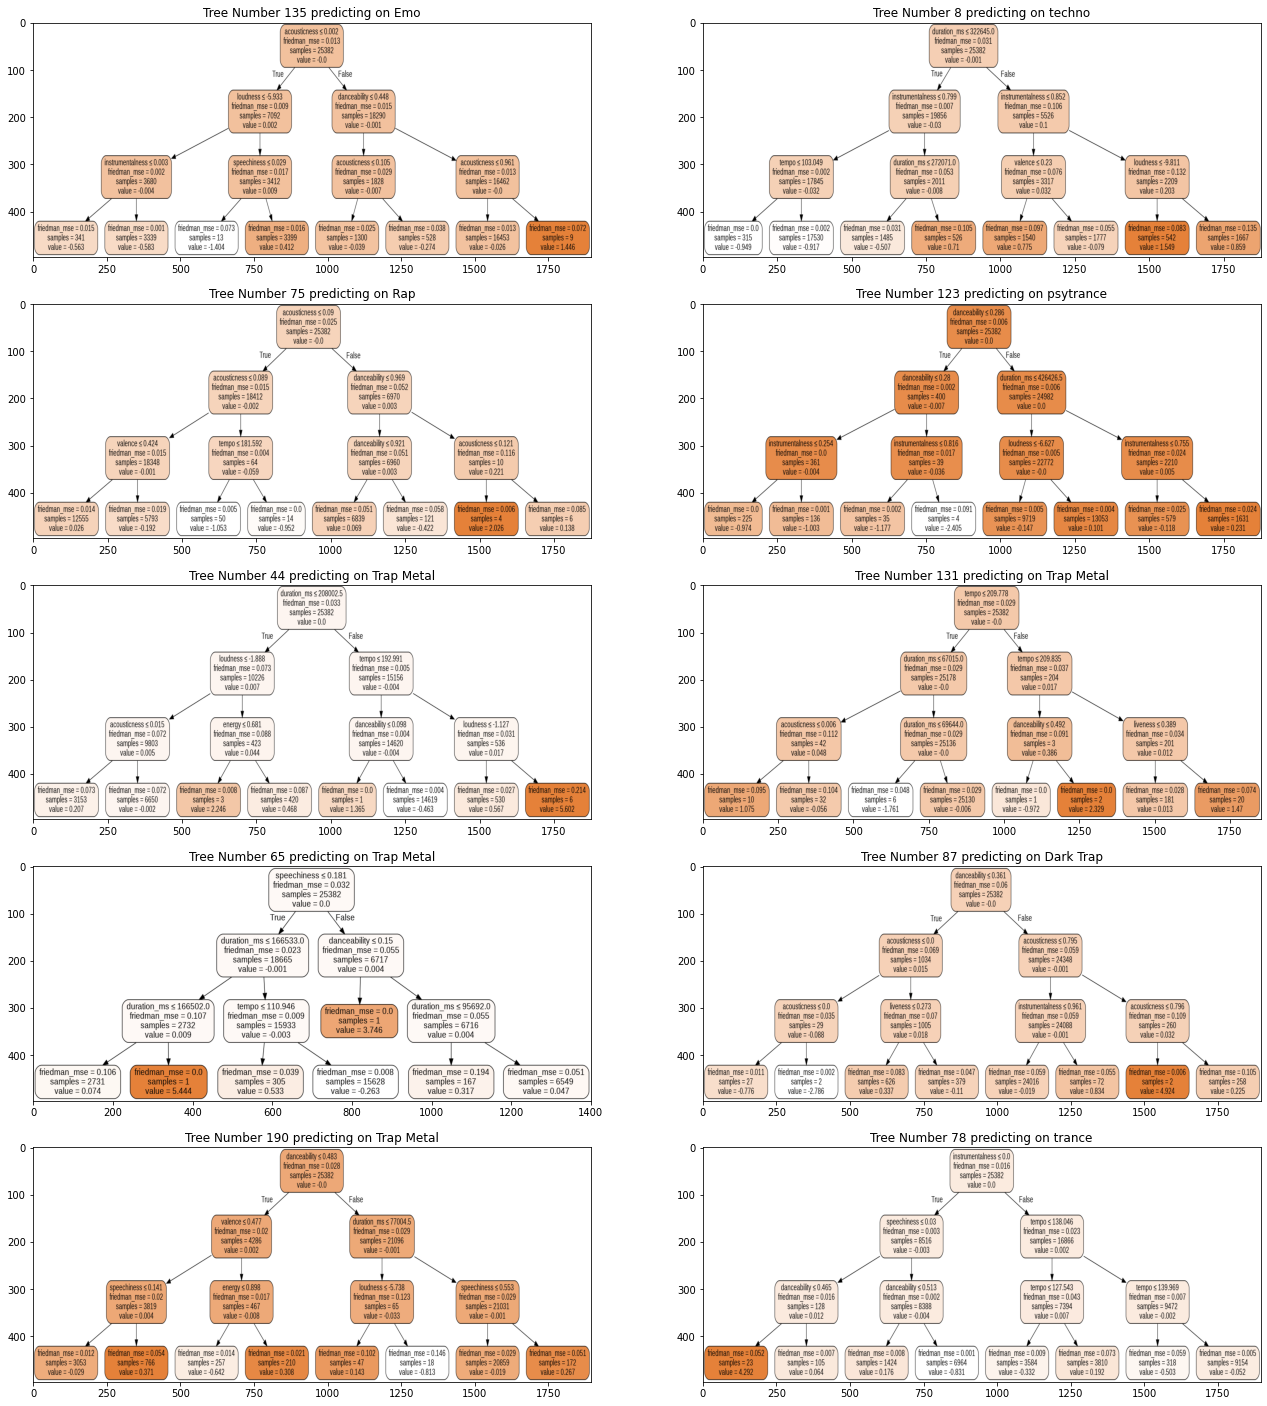

In [6]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import export_graphviz

_,axs=plt.subplots(ncols=2,nrows=5,figsize=(22,25))

for i,ax in enumerate(axs.flatten()):
    name='img'+str(i)+'.png'

    j,k=np.random.randint(0,200),np.random.randint(0,15)

    tree=boost3.estimators_[j,k]

    dot_data = export_graphviz(
        tree, feature_names=new_labels,class_names=genres,
        out_file=None, filled=True, rounded=True,
        special_characters=True)
    graph = graph_from_dot_data(dot_data)
    graph.write_png(name)

    plt.sca(ax)
    img=plt.imread(name)
    plt.imshow(img,aspect='auto')
    plt.title('Tree Number '+str(j)+' predicting on '+genres[k])
    
plt.show()

### Training and Testing accuracy at each stage

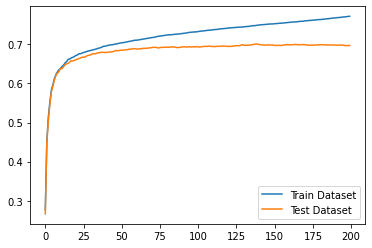

In [ ]:
accuracy_test = [f1_score(Y_test, y_pred,average='micro') for y_pred in boost3.staged_predict(X1_test)]
accuracy_train = [f1_score(Y_train, y_pred,average='micro') for y_pred in boost3.staged_predict(X1_train)]


plt.plot(accuracy_train,label='Train Dataset')
plt.plot(accuracy_test,label='Test Dataset')
plt.legend(loc='lower right')
plt.show()